In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Final_results.csv')
df

,Model_Name,Accuracy,Precision,Recall,F1_Score,CM_TN,CM_FP,CM_FN,CM_TP,Training_Time_Sec,Trainable_Params
0,VanillaRNN,0.5602,0.5671,0.5457,0.5562,1423,1052,1147,1378,178.88,29569
1,VanillaLSTM,0.8526,0.8341,0.8840,0.8583,2031,444,293,2232,157.44,117889
2,VanillaBidirectionalRNN,0.4894,0.4944,0.4859,0.4901,1220,1255,1298,1227,254.00,59137
3,VanillaBidirectionalLSTM,0.5090,0.5103,0.6875,0.5858,809,1666,789,1736,582.90,235777
4,VanillaRNNWithBahdanauAttention,0.7902,0.7272,0.9354,0.8183,1589,886,163,2362,282.26,235777
5,VanillaRNNWithLuongDotProductAttention,0.5052,0.5051,1.0000,0.6712,1,2474,0,2525,142.14,62593
6,VanillaRNNWithLuongGeneralAttention,0.6110,0.6390,0.5279,0.5782,1722,753,1192,1333,380.48,29697
7,VanillaRNNWithLuongConcatAttention,0.7798,0.9289,0.6107,0.7369,2357,118,983,1542,335.73,46081
8,VanillaBidirectionalRNNWithBahdanauAttention,0.7790,0.7133,0.9402,0.8112,1521,954,151,2374,705.85,62593
9,VanillaBidirectionalRNNWithLuongDotProductAtte...,0.6120,0.5746,0.8923,0.6990,807,1668,272,2253,609.17,125057


In [4]:

base_models = ['VanillaRNN', 'VanillaLSTM', 'VanillaBidirectionalRNN', 'VanillaBidirectionalLSTM']
# Define attention types

attention_types = ['WithBahdanauAttention', 'WithLuongDotProductAttention', 'WithLuongGeneralAttention', 'WithLuongConcatAttention']




In [5]:
# Function to plot bar plots for each base model group with attention types
# Display F1_Score as bar height, Training_Time_Sec and Trainable_Params above bars

def plot_attention_effects(plot_data, model_groups):
    for base, data in plot_data.items():
        plt.figure(figsize=(10, 6))
        bars = plt.bar(data.index, data['F1_Score'], color='skyblue')
        plt.title(f'Effect of Attention Types on {base}')
        plt.ylabel('F1 Score')
        plt.ylim(0, 1)
        plt.xticks(rotation=45, ha='right')
        
        # Annotate training time and params above bars
        for bar, (_, row) in zip(bars, data.iterrows()):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, 
                     f'Time: {row.Training_Time_Sec:.1f}s\nParams: {row.Trainable_Params} \n F1-Score:{row.F1_Score}',
                     ha='center', va='bottom', fontsize=8)
        plt.tight_layout()
        plt.show()


# Accross Attention Comparision. How does attention affects!

In [6]:
# Function to get model group for a base model
# Includes base model and all attention variants

def get_model_group(base):
    group = [base]
    for att in attention_types:
        model_name = base + att
        if model_name in df['Model_Name'].values:
            group.append(model_name)
    return group

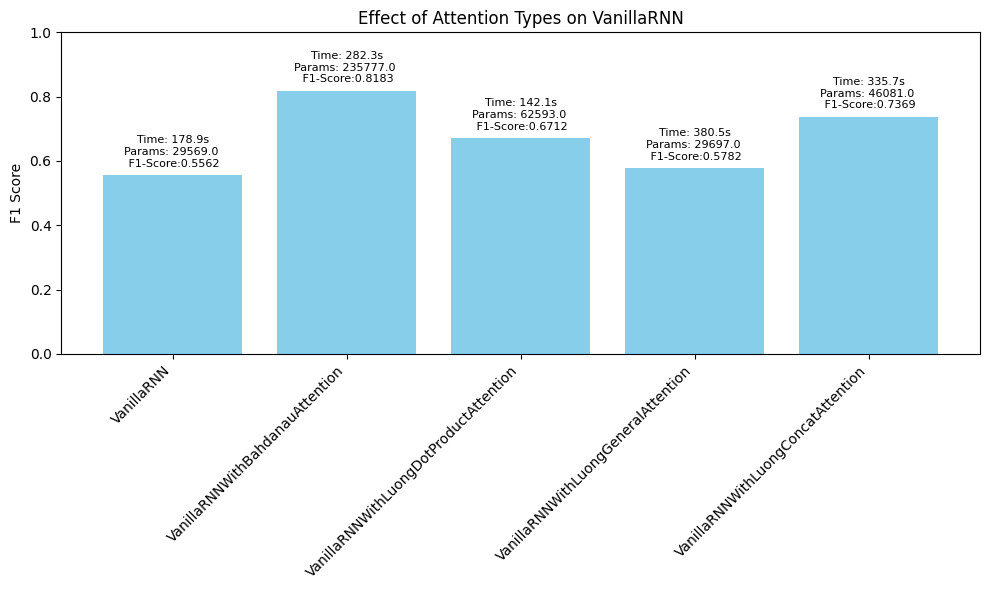

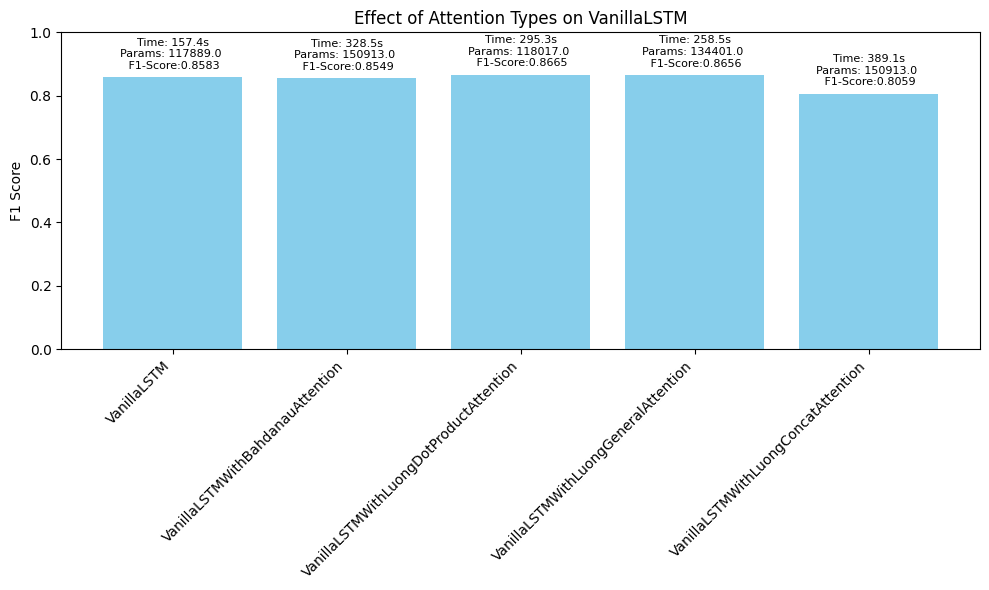

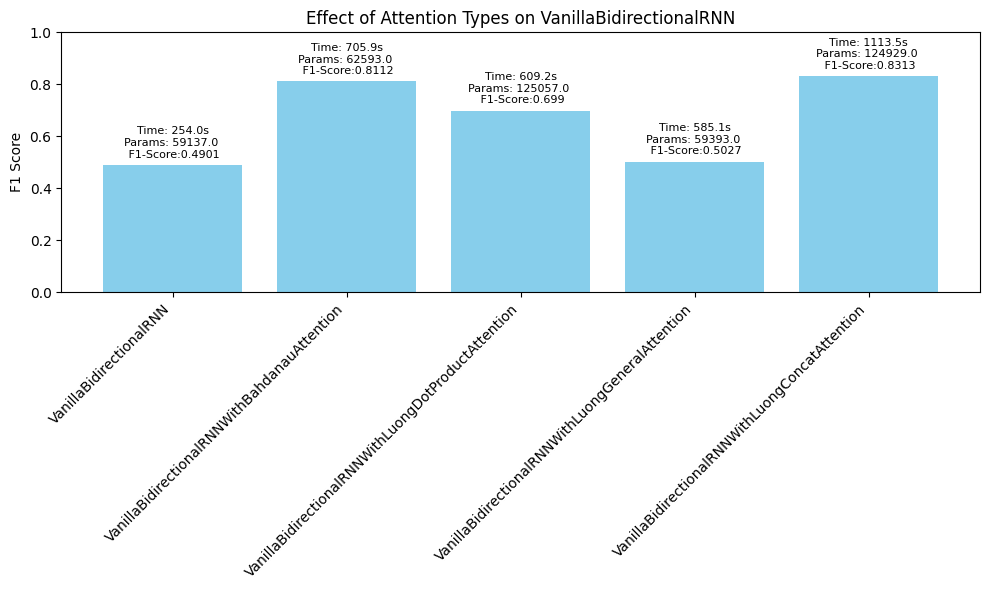

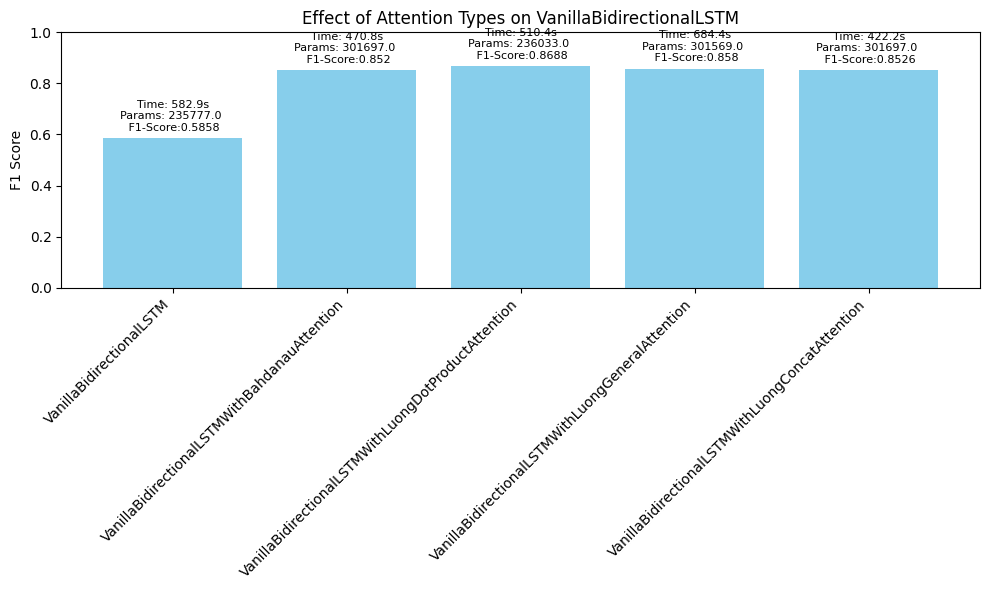

In [7]:
# Create groups for each base model
model_groups = {base: get_model_group(base) for base in base_models}

# Prepare data for plotting
# For each group, get F1_Score, Training_Time_Sec, Trainable_Params
plot_data = {}
for base, models in model_groups.items():
    plot_data[base] = df[df['Model_Name'].isin(models)][['Model_Name', 'F1_Score', 'Training_Time_Sec', 'Trainable_Params']].set_index('Model_Name')





# Plot for each base model group
plot_attention_effects(plot_data, model_groups)






* LSTM and Bidirectional LSTM generally outperform RNNs in F1-Score, even without attention.
* Luong Dot Product Attention achieves the highest F1-Score for LSTM and Bidirectional LSTM. While Interestingly the same attention recieved low score for both RNN and Bidirectional RNN

* Training time and parameters increase with attention, especially for Bahdanau and Concat variants.



# Cross model comparison with same attention

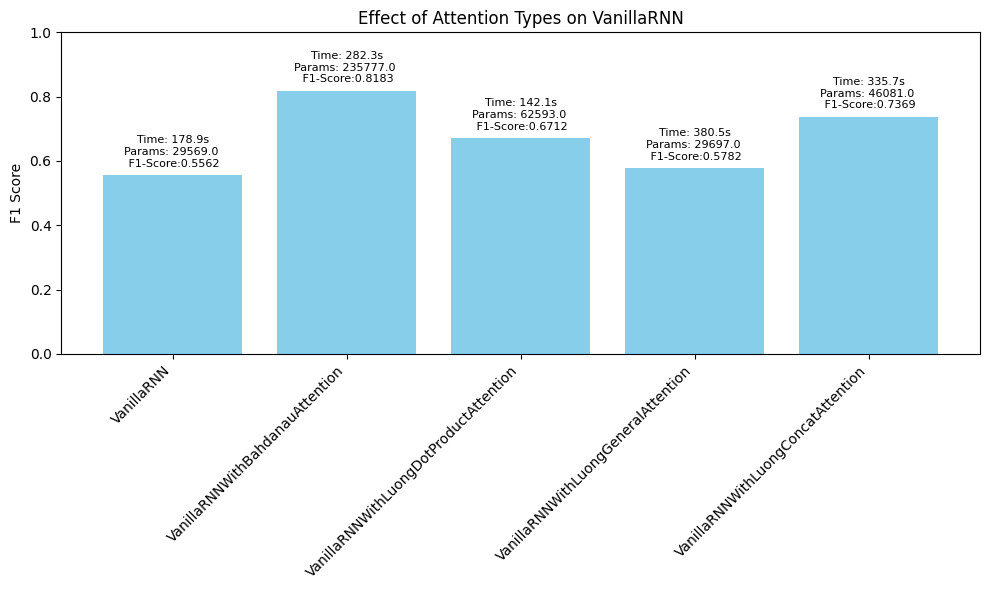

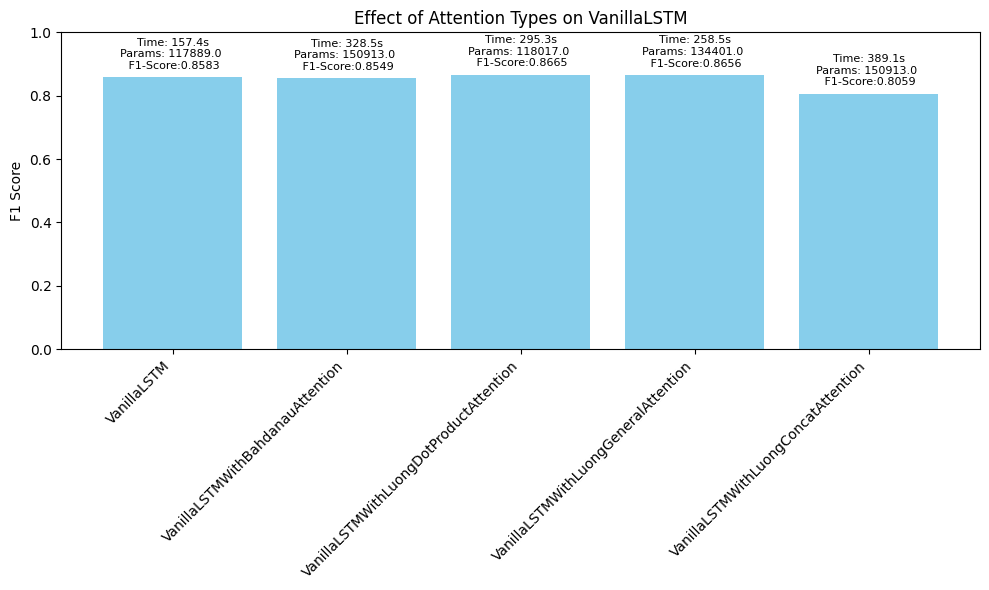

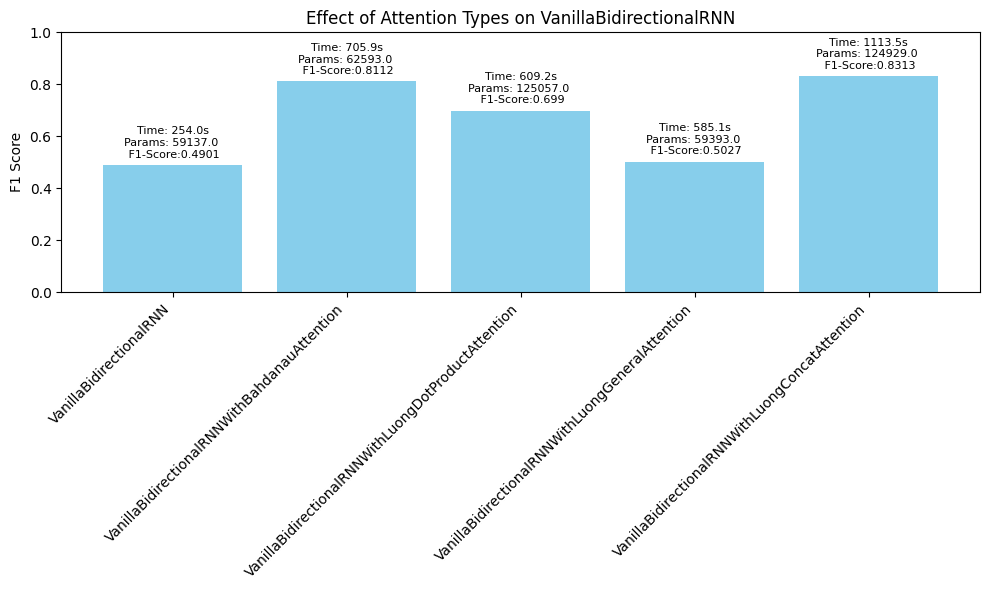

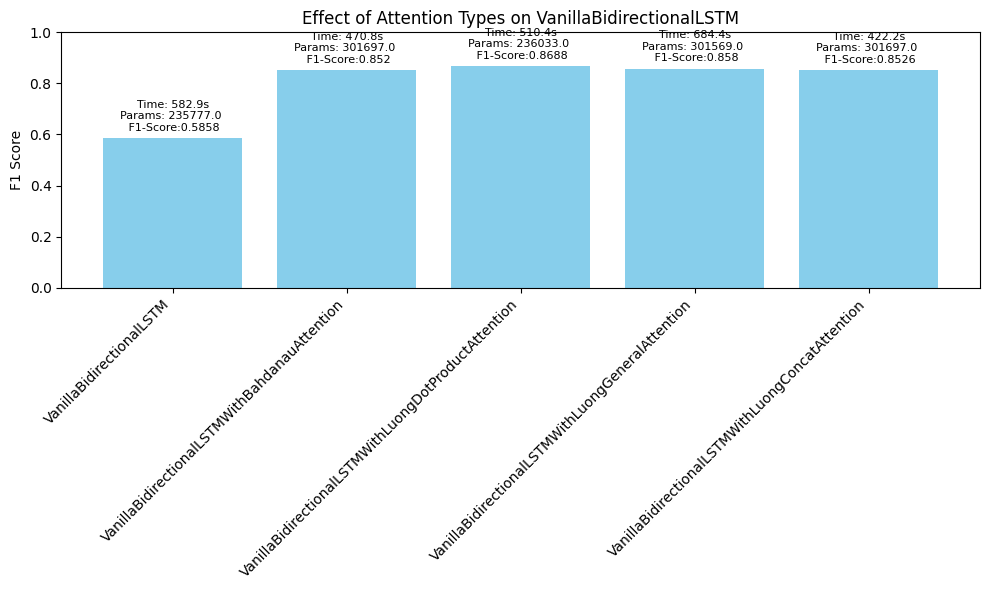

In [8]:
# Also prepare groups for cross model comparison with same attention
# Attention groups: base models only, and each attention type across base models
cross_model_groups = {}

# Base models only
cross_model_groups['BaseModels'] = base_models

# Attention groups
for att in attention_types:
    group = []
    for base in base_models:
        model_name = base + att
        if model_name in df['Model_Name'].values:
            group.append(model_name)
    cross_model_groups[att] = group

plot_data = {}
for base, models in model_groups.items():
    plot_data[base] = df[df['Model_Name'].isin(models)][['Model_Name', 'F1_Score', 'Training_Time_Sec', 'Trainable_Params']].set_index('Model_Name')

# Plot for each base model group
plot_attention_effects(plot_data, cross_model_groups)

* Attention mechanisms significantly improve F1-Score for all base models, especially for RNN and Bidirectional RNN, where Bahdanau and Luong Concat attention show the largest gains.


In [9]:
max_f1_score_ind= df['F1_Score'].argmax()
max_f1_score = df['F1_Score'].max()
max_f1_score_model  = df['Model_Name'][max_f1_score_ind]



print(f'max f1 score of {max_f1_score} is obtained by {max_f1_score_model}')

max f1 score of 0.8688 is obtained by VanillaBidirectionalLSTMWithLuongDotProductAttention


# Highest Scoring Models

In [19]:

df.sort_values(by='F1_Score', ascending=False).loc[:,['Model_name','F1_Score']]


KeyError: "['Model_name'] not in index"

* LSTM Models Dominate by occupying top 8 positions in view of F-1 Scores

In [11]:
df.sort_values(by='Accuracy', ascending=False).iloc[:,:5]


,Model_Name,Accuracy,Precision,Recall,F1_Score
13,VanillaLSTMWithLuongDotProductAttention,0.8652,0.8665,0.8665,0.8665
17,VanillaBidirectionalLSTMWithLuongDotProductAtt...,0.8646,0.8505,0.8879,0.8688
14,VanillaLSTMWithLuongGeneralAttention,0.8620,0.8517,0.8800,0.8656
19,VanillaBidirectionalLSTMWithLuongConcatAttention,0.8596,0.9071,0.8044,0.8526
12,VanillaLSTMWithBahdanauAttention,0.8586,0.8875,0.8246,0.8549
18,VanillaBidirectionalLSTMWithLuongGeneralAttention,0.8566,0.8582,0.8578,0.8580
1,VanillaLSTM,0.8526,0.8341,0.8840,0.8583
16,VanillaBidirectionalLSTMWithBahdanauAttention,0.8458,0.8265,0.8792,0.8520
15,VanillaLSTMWithLuongConcatAttention,0.8126,0.8449,0.7703,0.8059
11,VanillaBidirectionalRNNWithLuongConcatAttention,0.8096,0.7523,0.9287,0.8313


* LSTM Models Dominate by occupying top 9 positions in view of Accuracy

In [12]:
df.sort_values(by='Precision', ascending=False).iloc[:,:5]

,Model_Name,Accuracy,Precision,Recall,F1_Score
7,VanillaRNNWithLuongConcatAttention,0.7798,0.9289,0.6107,0.7369
19,VanillaBidirectionalLSTMWithLuongConcatAttention,0.8596,0.9071,0.8044,0.8526
12,VanillaLSTMWithBahdanauAttention,0.8586,0.8875,0.8246,0.8549
13,VanillaLSTMWithLuongDotProductAttention,0.8652,0.8665,0.8665,0.8665
18,VanillaBidirectionalLSTMWithLuongGeneralAttention,0.8566,0.8582,0.8578,0.8580
14,VanillaLSTMWithLuongGeneralAttention,0.8620,0.8517,0.8800,0.8656
17,VanillaBidirectionalLSTMWithLuongDotProductAtt...,0.8646,0.8505,0.8879,0.8688
15,VanillaLSTMWithLuongConcatAttention,0.8126,0.8449,0.7703,0.8059
1,VanillaLSTM,0.8526,0.8341,0.8840,0.8583
16,VanillaBidirectionalLSTMWithBahdanauAttention,0.8458,0.8265,0.8792,0.8520


In [13]:
# Define the desired order for base models and their attention variants
ordered_models = []
for base in base_models:
    ordered_models.append(base)
    for att in attention_types:
        model_name = base + att
        if model_name in df['Model_Name'].values:
            ordered_models.append(model_name)

# Reorder the dataframe based on the defined order
df_reordered = df.set_index('Model_Name').loc[ordered_models].reset_index()
df_reordered.iloc[:,:5]

,Model_Name,Accuracy,Precision,Recall,F1_Score
0,VanillaRNN,0.5602,0.5671,0.5457,0.5562
1,VanillaRNNWithBahdanauAttention,0.7902,0.7272,0.9354,0.8183
2,VanillaRNNWithLuongDotProductAttention,0.5052,0.5051,1.0000,0.6712
3,VanillaRNNWithLuongGeneralAttention,0.6110,0.6390,0.5279,0.5782
4,VanillaRNNWithLuongConcatAttention,0.7798,0.9289,0.6107,0.7369
5,VanillaLSTM,0.8526,0.8341,0.8840,0.8583
6,VanillaLSTMWithBahdanauAttention,0.8586,0.8875,0.8246,0.8549
7,VanillaLSTMWithLuongDotProductAttention,0.8652,0.8665,0.8665,0.8665
8,VanillaLSTMWithLuongGeneralAttention,0.8620,0.8517,0.8800,0.8656
9,VanillaLSTMWithLuongConcatAttention,0.8126,0.8449,0.7703,0.8059
